# Aviation Runway Safety; ASRS Exploratory Data Analysis
## Mino Cha

In [ ]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import pickle
from nltk.corpus import stopwords
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Import csv

In [ ]:
pd.set_option('display.max_columns', None)

ASRS_df = pd.read_csv('data/ASRS_combined_csv.csv')
# ASRS_df.head()

In [ ]:
ASRS_df = ASRS_df.drop('Unnamed: 125',axis=1)

new_column_name = ''
new_column_name_list = []

for column_name in ASRS_df.columns:
    new_column_name = ASRS_df.loc[0,column_name]
    if column_name == ' ':
        new_column_name = new_column_name
    else:
        new_column_name = column_name + '_' + new_column_name
    new_column_name_list.append(new_column_name)
ASRS_df.columns = new_column_name_list

ASRS_df = ASRS_df.drop(0)

ASRS_df.head()

,ACN,Time_Date,Time.1_Local Time Of Day,Place_Locale Reference,Place.1_State Reference,Place.2_Relative Position.Angle.Radial,Place.3_Relative Position.Distance.Nautical Miles,Place.4_Altitude.AGL.Single Value,Place.5_Altitude.MSL.Single Value,Place.6_Latitude / Longitude (UAS),Environment_Flight Conditions,Environment.1_Weather Elements / Visibility,Environment.2_Work Environment Factor,Environment.3_Light,Environment.4_Ceiling,Environment.5_RVR.Single Value,Aircraft 1_ATC / Advisory,Aircraft 1.1_Aircraft Operator,Aircraft 1.2_Make Model Name,Aircraft 1.3_Aircraft Zone,Aircraft 1.4_Crew Size,Aircraft 1.5_Operating Under FAR Part,Aircraft 1.6_Flight Plan,Aircraft 1.7_Mission,Aircraft 1.8_Nav In Use,Aircraft 1.9_Flight Phase,Aircraft 1.10_Route In Use,Aircraft 1.11_Airspace,Aircraft 1.12_Maintenance Status.Maintenance Deferred,Aircraft 1.13_Maintenance Status.Records Complete,Aircraft 1.14_Maintenance Status.Released For Service,Aircraft 1.15_Maintenance Status.Required / Correct Doc On Board,Aircraft 1.16_Maintenance Status.Maintenance Type,Aircraft 1.17_Maintenance Status.Maintenance Items Involved,Aircraft 1.18_Cabin Lighting,Aircraft 1.19_Number Of Seats.Number,Aircraft 1.20_Passengers On Board.Number,Aircraft 1.21_Crew Size Flight Attendant.Number Of Crew,Aircraft 1.22_Airspace Authorization Provider (UAS),Aircraft 1.23_Operating Under Waivers / Exemptions / Authorizations (UAS),Aircraft 1.24_Waivers / Exemptions / Authorizations (UAS),Aircraft 1.25_Airworthiness Certification (UAS),Aircraft 1.26_Weight Category (UAS),Aircraft 1.27_Configuration (UAS),Aircraft 1.28_Flight Operated As (UAS),Aircraft 1.29_Flight Operated with Visual Observer (UAS),Aircraft 1.30_Control Mode (UAS),Aircraft 1.31_Flying In / Near / Over (UAS),Aircraft 1.32_Passenger Capable (UAS),Aircraft 1.33_Type (UAS),Aircraft 1.34_Number of UAS Being Controlled (UAS),Component_Aircraft Component,Component.1_Manufacturer,Component.2_Aircraft Reference,Component.3_Problem,Aircraft 2_ATC / Advisory,Aircraft 2.1_Aircraft Operator,Aircraft 2.2_Make Model Name,Aircraft 2.3_Aircraft Zone,Aircraft 2.4_Crew Size,Aircraft 2.5_Operating Under FAR Part,Aircraft 2.6_Flight Plan,Aircraft 2.7_Mission,Aircraft 2.8_Nav In Use,Aircraft 2.9_Flight Phase,Aircraft 2.10_Route In Use,Aircraft 2.11_Airspace,Aircraft 2.12_Maintenance Status.Maintenance Deferred,Aircraft 2.13_Maintenance Status.Records Complete,Aircraft 2.14_Maintenance Status.Released For Service,Aircraft 2.15_Maintenance Status.Required / Correct Doc On Board,Aircraft 2.16_Maintenance Status.Maintenance Type,Aircraft 2.17_Maintenance Status.Maintenance Items Involved,Aircraft 2.18_Cabin Lighting,Aircraft 2.19_Number Of Seats.Number,Aircraft 2.20_Passengers On Board.Number,Aircraft 2.21_Crew Size Flight Attendant.Number Of Crew,Aircraft 2.22_Airspace Authorization Provider (UAS),Aircraft 2.23_Operating Under Waivers / Exemptions / Authorizations (UAS),Aircraft 2.24_Waivers / Exemptions / Authorizations (UAS),Aircraft 2.25_Airworthiness Certification (UAS),Aircraft 2.26_Weight Category (UAS),Aircraft 2.27_Configuration (UAS),Aircraft 2.28_Flight Operated As (UAS),Aircraft 2.29_Flight Operated with Visual Observer (UAS),Aircraft 2.30_Control Mode (UAS),Aircraft 2.31_Flying In / Near / Over (UAS),Aircraft 2.32_Passenger Capable (UAS),Aircraft 2.33_Type (UAS),Aircraft 2.34_Number of UAS Being Controlled (UAS),Person 1_Location Of Person,Person 1.1_Location In Aircraft,Person 1.2_Reporter Organization,Person 1.3_Function,Person 1.4_Qualification,Person 1.5_Experience,Person 1.6_Cabin Activity,Person 1.7_Human Factors,Person 1.8_Communication Breakdown,Person 1.9_UAS Communication Breakdown,Person 1.10_ASRS Report Number.Accession Number,Person 2_Location Of Person,Person 2.1_Location In Aircraft,Person 2.2_Reporter Organization,Person 2.3_Function,Person 2.4_Qualification,Person 2.5_Experience,Person 2.6_Cabin Activity,Person 2.7_Human Factors,Person 2.8_Communication Breakdown,Person 2.9_UAS Communication Breakdown,Per

In [ ]:
pd.set_option('display.max_rows', 200)
# ASRS_df['Aircraft 1.2'].isnull().sum() # Make Model Name
# ASRS_df['Component.3'] # Problem
# ASRS_df.at[3,'Report 1']
# ASRS_df['Person 1'] # Location Of Person

# ASRS_df['Aircraft 2.9'] # Problem
# ASRS_df['Aircraft 2.5'] # Problem

In [ ]:
ASRS_df.columns
# sns.countplot(ASRS_df['Events'])

Index(['ACN', 'Time_Date', 'Time.1_Local Time Of Day',
       'Place_Locale Reference', 'Place.1_State Reference',
       'Place.2_Relative Position.Angle.Radial',
       'Place.3_Relative Position.Distance.Nautical Miles',
       'Place.4_Altitude.AGL.Single Value',
       'Place.5_Altitude.MSL.Single Value',
       'Place.6_Latitude / Longitude (UAS)',
       ...
       'Events.3_Detector', 'Events.4_When Detected', 'Events.5_Result',
       'Assessments_Contributing Factors / Situations',
       'Assessments.1_Primary Problem', 'Report 1_Narrative',
       'Report 1.1_Callback', 'Report 2_Narrative', 'Report 2.1_Callback',
       'Report 1.2_Synopsis'],
      dtype='object', length=125)

In [ ]:
ASRS_df_selected = ASRS_df[['Time_Date', 'Place_Locale Reference', 'Environment_Flight Conditions', 'Events_Anomaly', 'Events.5_Result', 'Assessments_Contributing Factors / Situations', 'Assessments.1_Primary Problem', 'Report 1_Narrative', 'Report 1.2_Synopsis']]

ASRS_df_selected

,Time_Date,Place_Locale Reference,Environment_Flight Conditions,Events_Anomaly,Events.5_Result,Assessments_Contributing Factors / Situations,Assessments.1_Primary Problem,Report 1_Narrative,Report 1.2_Synopsis
1,198801,MEM,VMC,Other Unspecified,General None Reported / Taken,NaN,Airport,CLRD TO LAND ON RWY 27. AFTER LNDG WE MADE THE...,ACR LTT TAXIED ON CLOSED TAXIWAY.
2,198801,JFK,VMC,Conflict Ground Conflict; Critical,Aircraft Aircraft Damaged; General None Report...,NaN,Airport,WX CONDITION CLR. ON APCH TO ILS 4R JFK FOLLOW...,FLT CREW FAILED TO RETRACT WING FLAPS TO THE F...
3,198801,DFW,IMC,Aircraft Equipment Problem Less Severe; Deviat...,General None Reported / Taken,NaN,Human Factors,DURING PWRBACK FROM THE GATE AT DFW; POSSIBLE ...,ACR MLG POWERED BACK WITH ICE AND SNOW ON RAMP...
4,198801,BIS,VMC,Ground Event / Encounter Loss Of Aircraft Cont...,General None Reported / Taken,NaN,Weather,WHILE FLYING FO ON FLT LNDG BISMARCK VISUAL AP...,ACR MLG EXCURSION FROM ICY TXWY AFTER LNDG.
5,198801,STL,VMC,ATC Issue All Types; Conflict Ground Conflict;...,General None Reported / Taken,Airport; Procedure,Human Factors,SMT X LANDED ON RWY 30R. AS HE SLOWED TO TAXI ...,CTLR HAD LESS THAN STANDARD SEPARATION BETWEEN...
...,...,...,...,...,...,...,...,...,...
46767,202306,CVG.Airport,NaN,Aircraft Equipment Problem Less Severe; Deviat...,NaN,Human Factors; Procedure; Aircraft; ATC Equipm...,Aircraft,I was informed ATC reported an incorrect fligh...,Air carrier Captain reported that incorrect fl...
46768,202307,BUF.Airport,NaN,Aircraft Equipment Problem Less Severe; Deviat...,Air Traffic Control Provided Assistance; Air T...,Aircraft; Chart Or Publication; Procedure; Sof...,Software and Automation,Enroute we noticed the distance from WURSOL to...,Air carrier pilot reported a discrepancy betwe...
46769,202307,K81.Airport,VMC,Conflict Ground Conflict; Critical; Deviation ...,Flight Crew Took Evasive Action,Procedure; Airport,Ambiguous,Notice of the intent to close Runway 21 at K81...,Pilot reported difficulty discerning whether t...
46770,202307,RCSS.Airport,VMC,Deviation / Discrepancy - Procedural Other / U...,General None Reported / Taken,Airport,Airport,Runway marking dangerously worn. First reporte...,Air carrier Captain reported the runway markin...


### Data Manipulation to feed into spaCy models

In [ ]:
# Time = ASRS_df_selected['Time_Date'].values[1:]
# Place = ASRS_df_selected['Place'].values[1:]
# Anomaly = ASRS_df_selected['Events'].values[1:]
# Result = ASRS_df_selected['Events.5'].values[1:]
# Cfactors = ASRS_df_selected['Assessments'].values[1:]
# PrimaryProb = ASRS_df_selected['Assessments.1'].values[1:]
# Narrative = ASRS_df_selected['Report 1_Narrative']
# Synopsis = ASRS_df_selected['Report 1.2'].values[1:]

In [ ]:
# select narrative column
Narrative = ASRS_df_selected['Report 1_Narrative']

# Lowercasing
Narrative = Narrative.str.lower()

# remove stop words
stop_words = set(stopwords.words('english'))
Narrative = Narrative.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))


Narrative = Narrative.values
Narrative

array(["clrd land rwy 27. lndg made first left turn-off taxiway oscar. contacted gnd; clrd us hangar said 'just information taxiway used closed notamed service couple weeks.' acknowledged xmission. checked printout memphis notams; listened departure atis; listen arrival atis found nothing indicating taxiway closed. since gnd ctlr seem pleasant mood elected question matter.",
       "wx condition clr. apch ils 4r jfk following acr wdb; receive lndg clrnc 100' wdb exit rwy (he could find txwy). twr asked us take immediate high spd exit tfc behind us getting close final. exiting rwy twr asked able take sharp left high spd taxi. snow banks ice unable make left. time coplt completing lndg chklist asked see acft would clr snow bank right side. response 'no.' told inform atc could make turn safely. concentration chklist diverted. nearing end lndg chklist; diversion feel caused omit retracting flaps 0. gate acft shutdown; pax deplaned prepared leave cockpit coplt realized retracted flaps silen

### Visualization

In [ ]:
print(ASRS_df['Place_Locale Reference'].value_counts()[5:50]) # both ORD.Airport and ORD exists --> ????

# for airport in ASRS_df['Place'].value_counts()[5:50]:
#     print(airport)


Place_Locale Reference
ORD.Airport    571
LAX.Airport    491
SFO.Airport    467
DEN.Airport    426
ATL.Airport    358
TEB.Airport    349
DFW.Airport    340
LAS.Airport    308
EWR.Airport    305
LGA.Airport    271
CLT.Airport    266
PHL.Airport    226
IAH.Airport    223
MIA.Airport    219
BOS.Airport    215
ZZZZ.ARTCC     214
JFK.Airport    206
SEA.Airport    195
DCA.Airport    194
IAD.Airport    189
PHX.Airport    170
MDW.Airport    158
ORD            157
BWI.Airport    154
DFW            149
DTW.Airport    136
SCT.TRACON     135
MEM.Airport    131
SLC.Airport    128
ATL            111
NCT.TRACON     109
OAK.Airport    109
SJC.Airport    107
MSP.Airport    102
SNA.Airport    100
PIT             98
ABQ.Airport     98
BUR.Airport     98
SAN.Airport     98
MCO.Airport     94
N90.TRACON      94
EWR             94
LAX             94
D01.TRACON      91
DTW             90
Name: count, dtype: int64


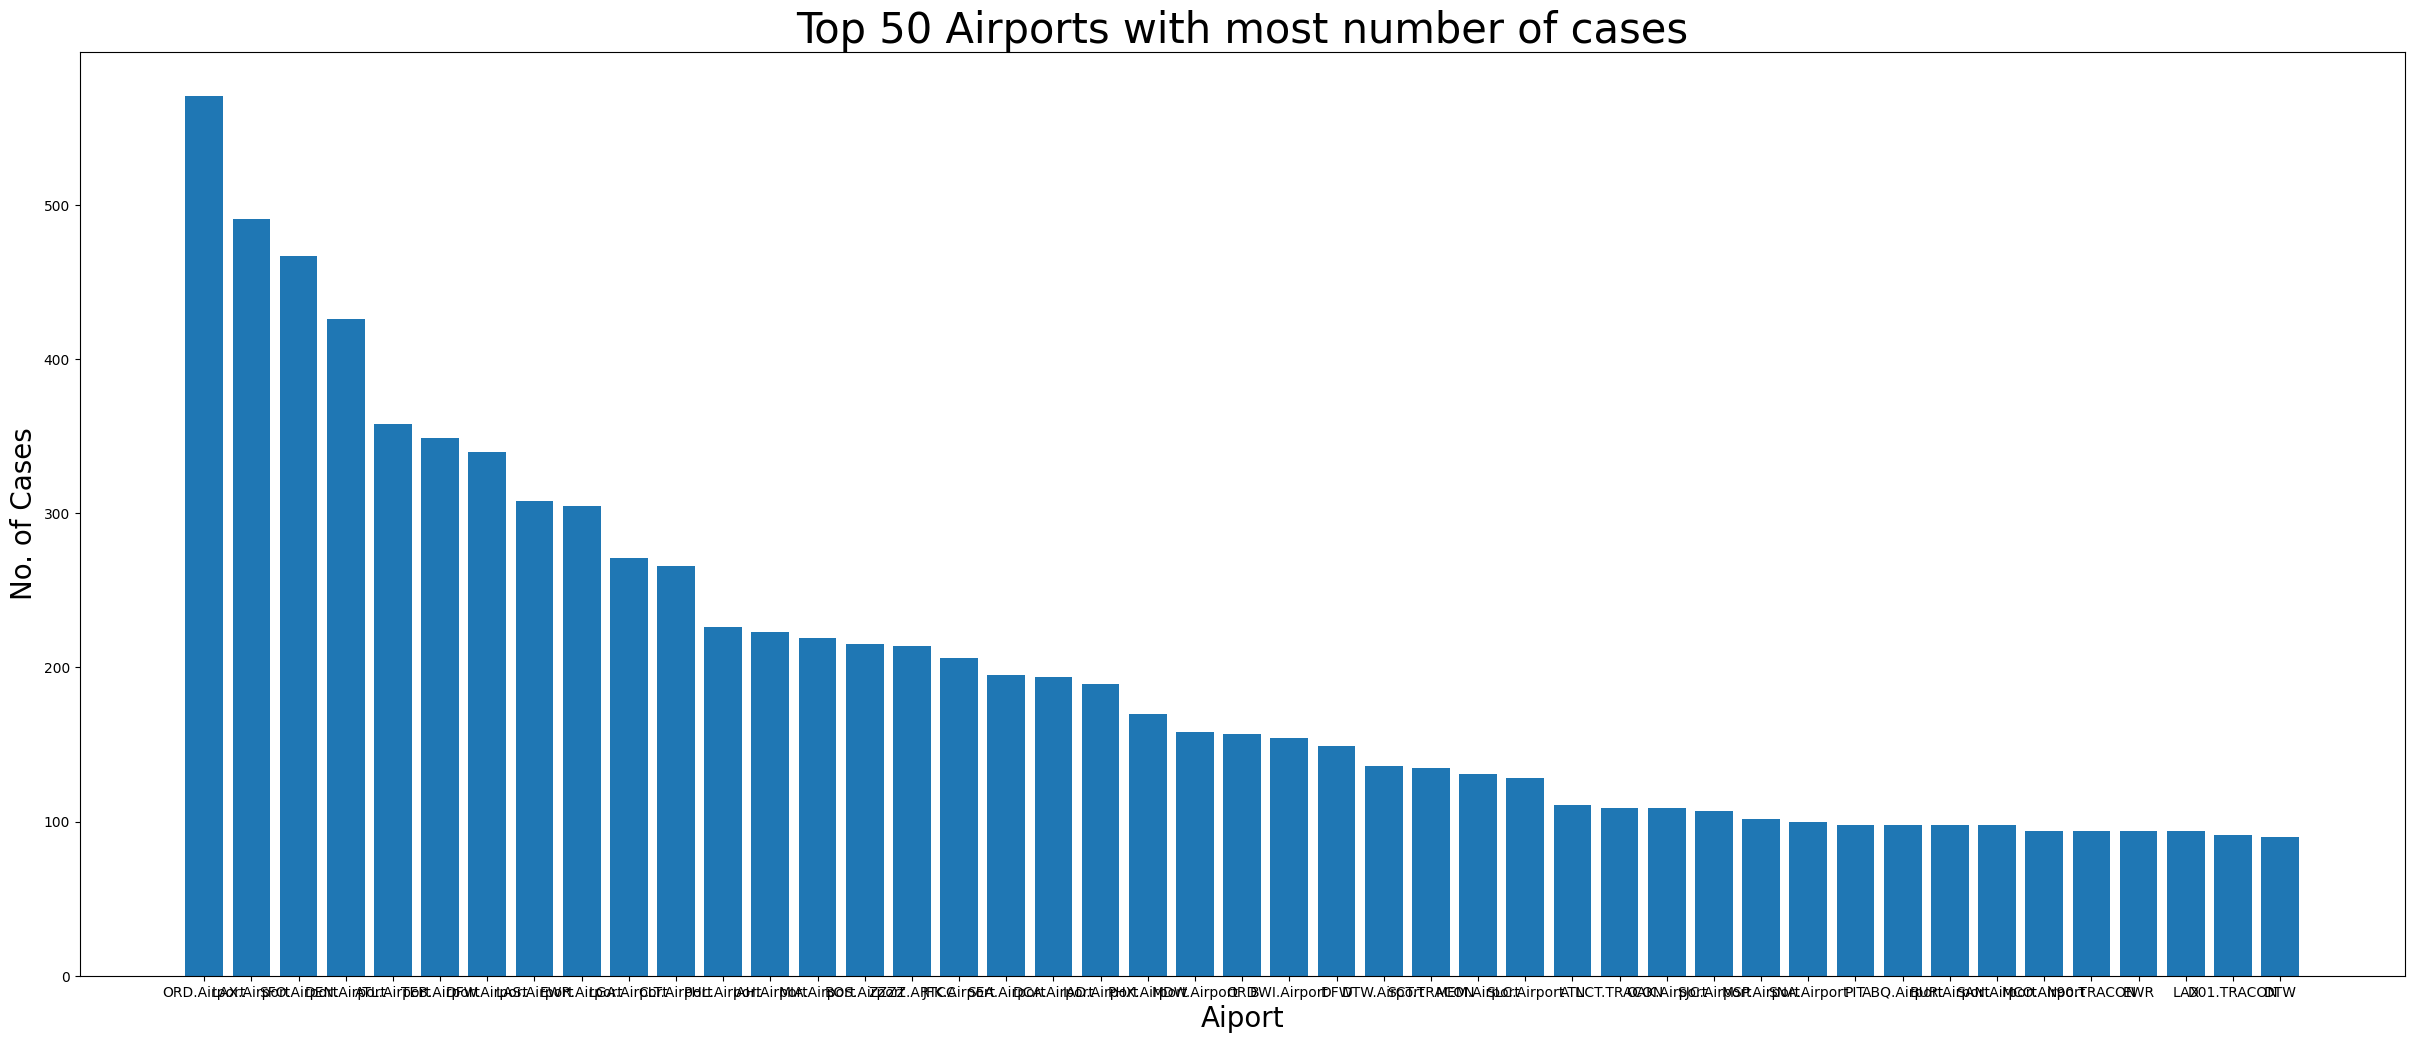

In [ ]:
# pd.set_option('display.max_rows', None)
Airport_dict = dict(ASRS_df['Place_Locale Reference'].value_counts()[5:50])

plt.figure(figsize=(30,12))
plt.title('Top 50 Airports with most number of cases', fontsize=30)
plt.bar(Airport_dict.keys(), Airport_dict.values())
plt.ylabel('No. of Cases', fontsize=20)
plt.xlabel('Aiport', fontsize=20)
plt.show()

In [ ]:
ASRS_df[ASRS_df['Place.1_State Reference']!='US']['Place.1_State Reference']

1        TN
2        NY
3        TX
4        ND
5        MO
         ..
46767    KY
46768    NY
46769    KS
46770    FO
46771    PA
Name: Place.1_State Reference, Length: 27368, dtype: object

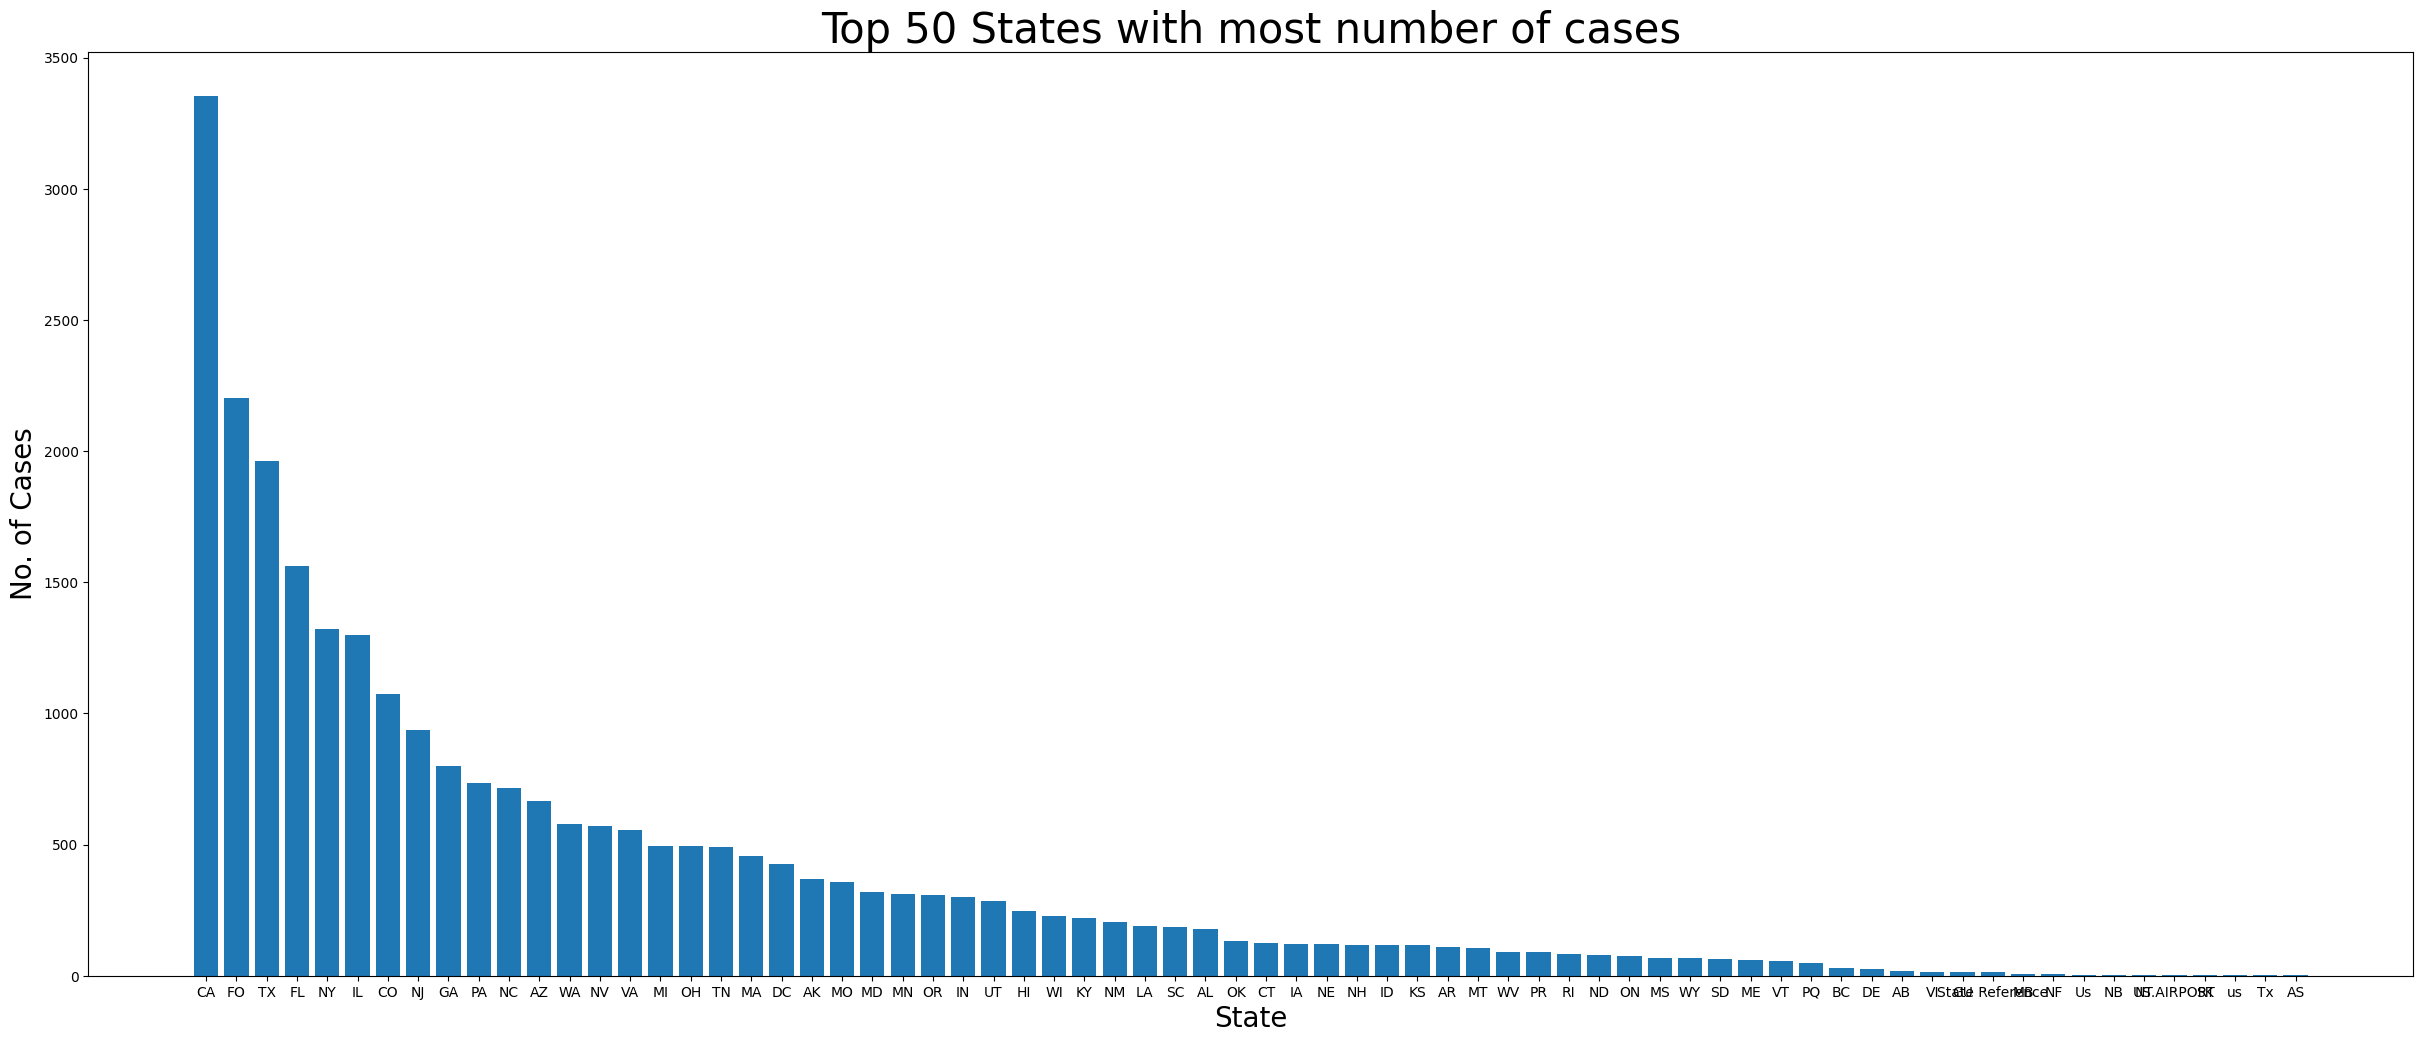

In [ ]:
# State_dict = dict(ASRS_df['Place.1_State Reference'].value_counts()[1:50])
State_dict = dict(ASRS_df[ASRS_df['Place.1_State Reference']!='US']['Place.1_State Reference'].value_counts())

plt.figure(figsize=(30,12))
plt.title('Top 50 States with most number of cases', fontsize=30)
plt.bar(State_dict.keys(), State_dict.values())
plt.ylabel('No. of Cases', fontsize=20)
plt.xlabel('State', fontsize=20)
plt.show()

### Map using geopandas

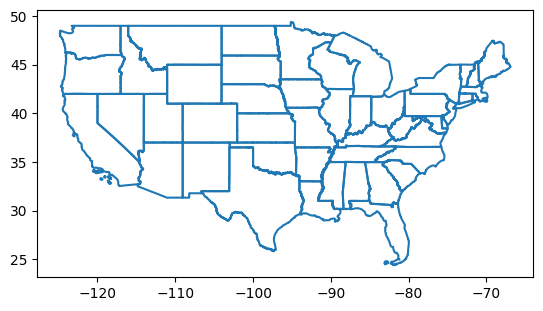

In [ ]:
# import states shapefile
df = gpd.read_file('data/tl_2022_us_state/tl_2022_us_state.shp')
df = df.to_crs("EPSG:4326")

# remove states not in North America
non_continental = ['HI','VI','MP','GU','AK','AS','PR']
us49 = df
for n in non_continental:
    us49 = us49[us49.STUSPS != n]

# quick plot
# us49.boundary.plot()
# plt.show()

In [ ]:
# Count occurrences of each state
state_counts = ASRS_df[ASRS_df['Place.1_State Reference']!='US']['Place.1_State Reference'].value_counts()

# Merge the state counts with the GeoDataFrame
# gdf_merged = gdf.set_index('name').join(state_counts)
state_counts_df = pd.DataFrame(state_counts).reset_index()
state_counts_df.columns = ['STUSPS','count']


gdf_merged = us49.merge(state_counts_df, on='STUSPS', how='left').fillna(0)
gdf_merged.head()

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,count
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333...",89
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ...",1561
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282...",1299
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998...",310
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243...",320
5,1,1,44,01219835,44,RI,Rhode Island,00,G4000,A,2677763373,1323686975,+41.5964850,-071.5264901,"MULTIPOLYGON (((-71.67881 41.15891, -71.67626 ...",81
6,4,8,16,01779783,16,ID,Idaho,00,G4000,A,214049908397,2391592787,+44.3484222,-114.5588538,"POLYGON ((-116.35844 49.00047, -116.34805 49.0...",119
7,1,1,33,01779794,33,NH,New Hampshire,00,G4000,A,23190126218,1025960758,+43.6726907,-071.5843145,"POLYGON ((-70.83887 43.24449, -70.83886 43.244...",119
8,3,5,37,01027616,37,NC,North Carolina,00,G4000,A,125935585728,13453835222,+35.5397100,-079.1308636,"POLYGON ((-77.89977 36.54460, -77.89942 36.544...",714
9,1,1,50,01779802,50,VT,Vermont,00,G4000,A,23872569964,1030754610,+44.0589536,-072.6710173,"POLYGON ((-72.04187 44.15665, -72.04180 44.156...",56


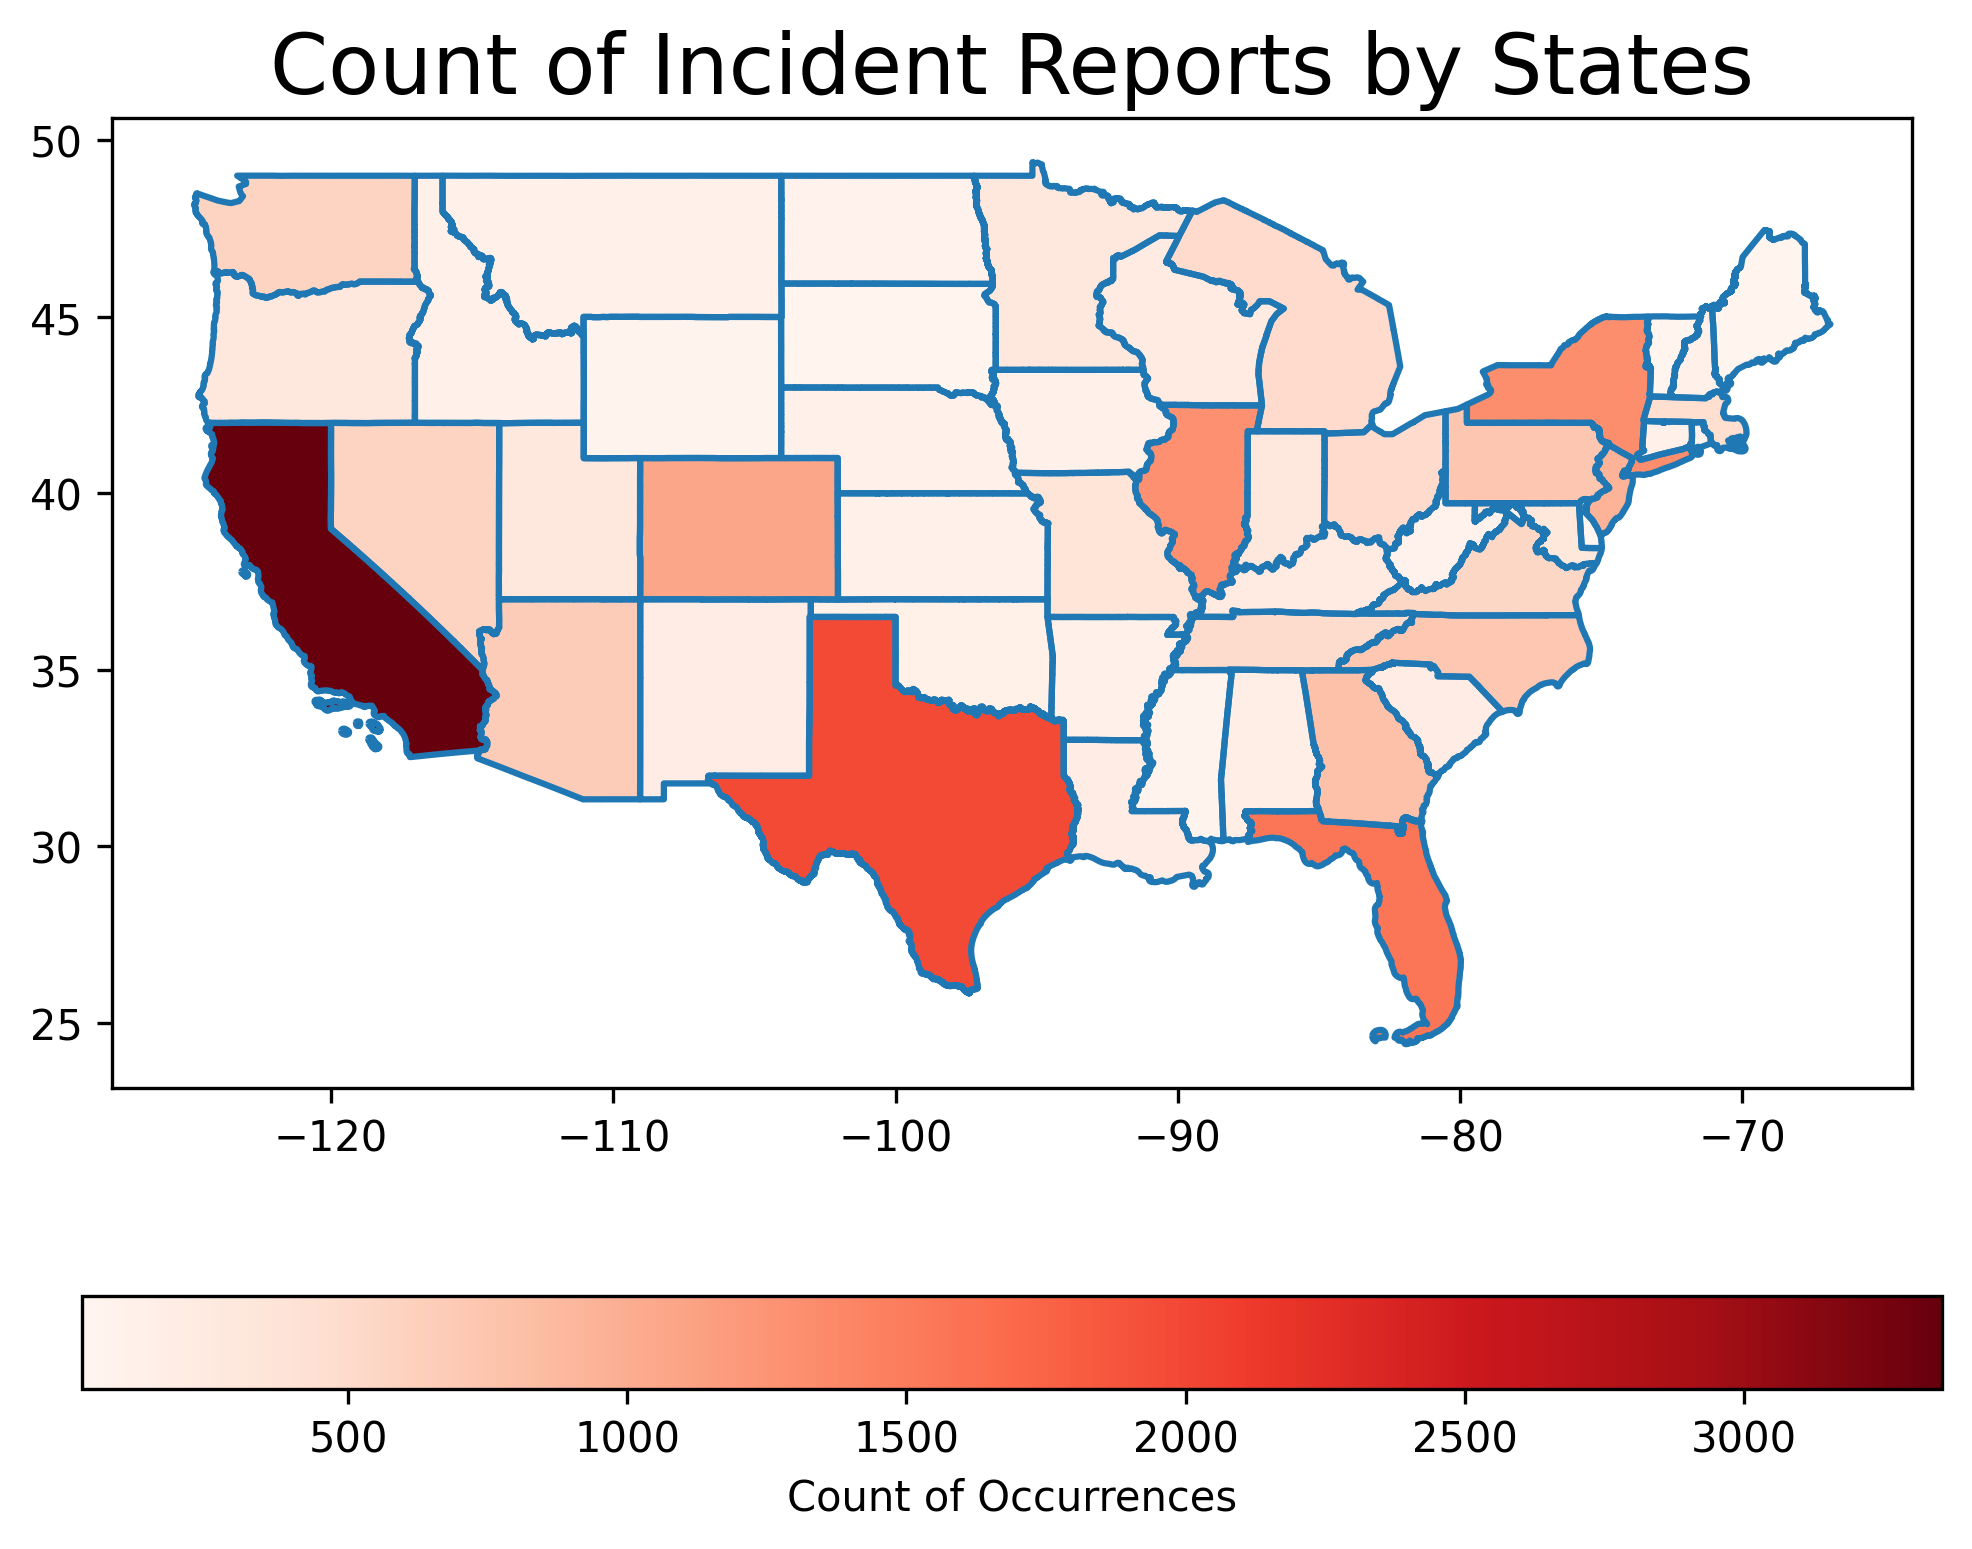

In [ ]:
# Plot the map
f,ax = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=300)
# fig, ax = plt.subplots(1, 1, figsize=(15, 25))
gdf_merged.boundary.plot(ax=ax)
gdf_merged.plot(column='count', ax=ax, legend=True, cmap='Reds',
                legend_kwds={'label': "Count of Occurrences",
                             'orientation': "horizontal"})

plt.title('Count of Incident Reports by States', fontdict={'fontsize': '20', 'fontweight' : '3'})
# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
plt.show()

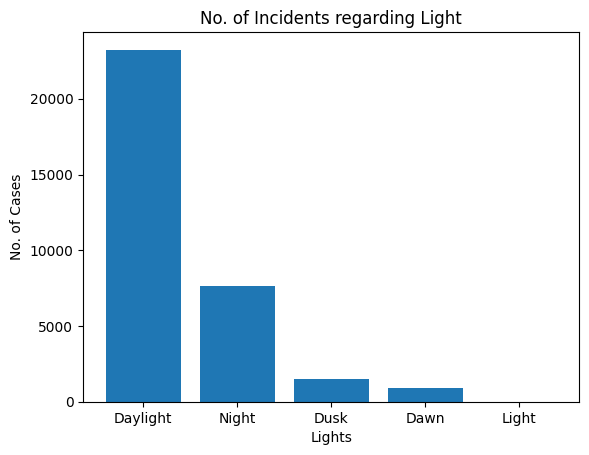

In [ ]:
Light_dict = dict(ASRS_df['Environment.3_Light'].value_counts())

# plt.figure(figsize=(30,12))
plt.title('No. of Incidents regarding Light')
plt.bar(Light_dict.keys(), Light_dict.values())
plt.ylabel('No. of Cases')
plt.xlabel('Lights')
plt.show()

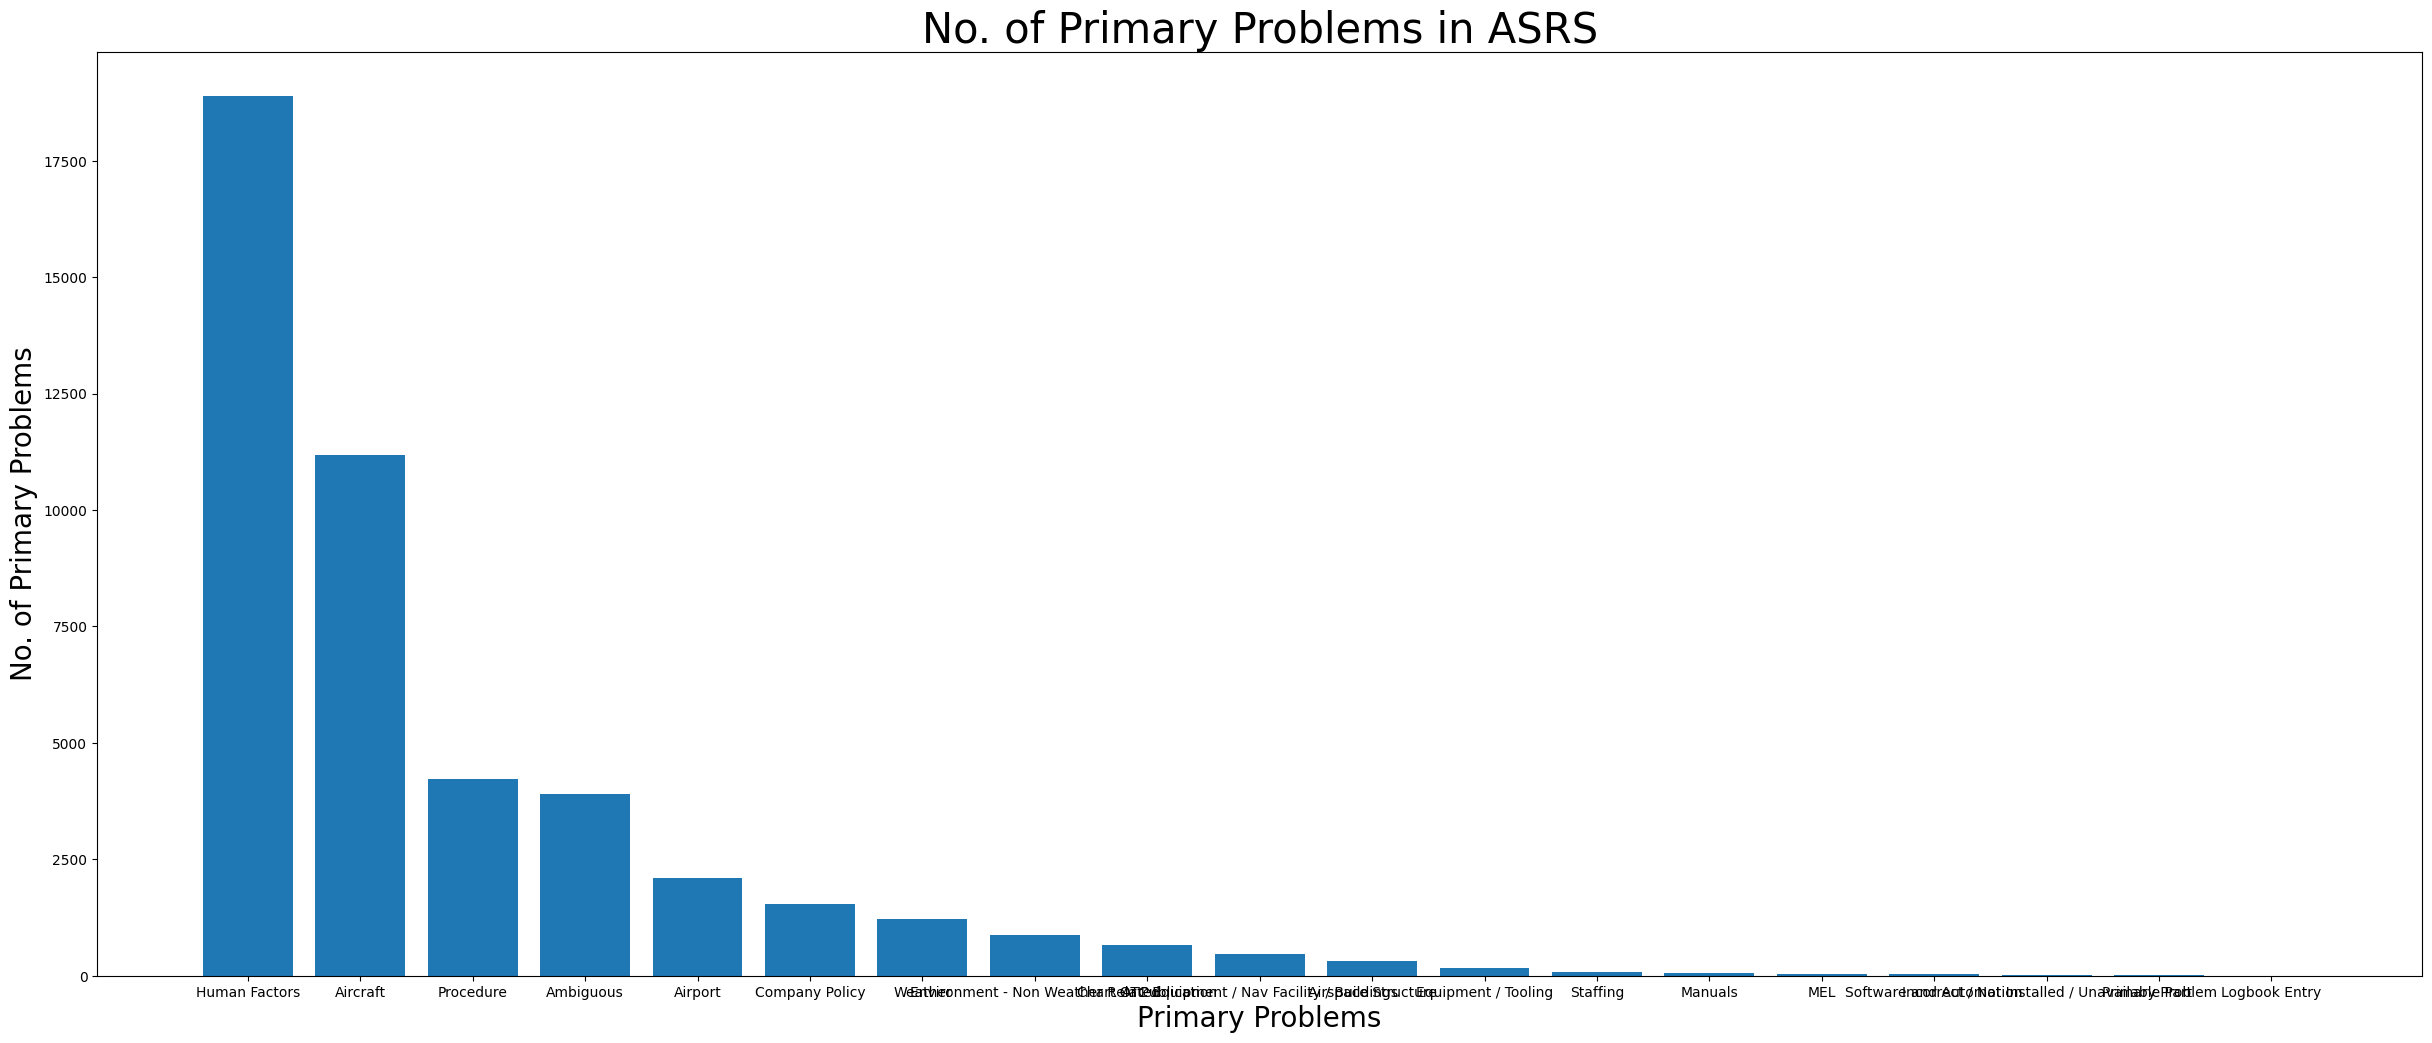

In [ ]:
PrimaryProb_dict = dict(ASRS_df_selected['Assessments.1_Primary Problem'].value_counts())

plt.figure(figsize=(30,12))
plt.title('No. of Primary Problems in ASRS', fontsize=30)
plt.bar(PrimaryProb_dict.keys(), PrimaryProb_dict.values())
plt.ylabel('No. of Primary Problems', fontsize=20)
plt.xlabel('Primary Problems', fontsize=20)
plt.show()

# EDA using spaCy and wordcloud

### load spaCy model

In [ ]:
# python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

### Convert Narrative into lemmas

In [ ]:
Narr_lst = Narrative.tolist()
Narr_str = " ".join(map(str, Narr_lst))
print("Length of Narrative: ", len(Narr_str))

Length of Narrative:  54091496


### wordcloud with raw string

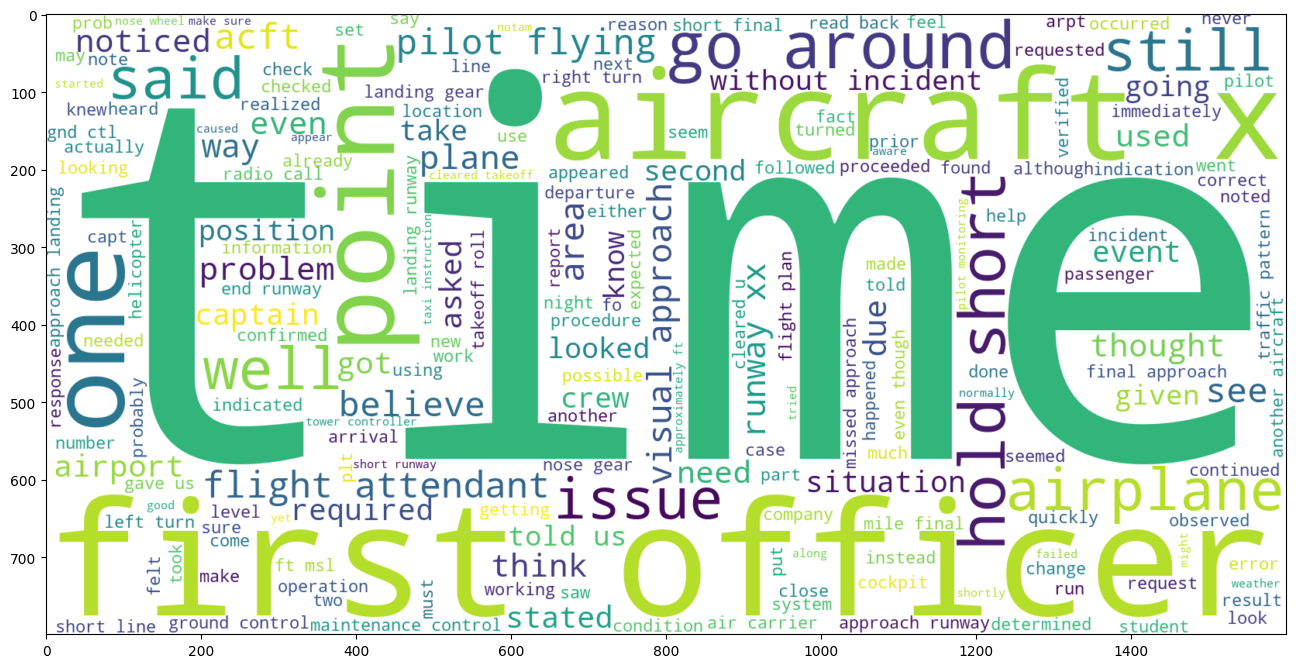

In [ ]:
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size=10, max_font_size=3000, background_color='white', width=1600, height=800).generate(Narr_str)
plt.imshow(wc, interpolation='bilinear')

### wordcloud with lemmas

In [ ]:
'''
# Takes long time
# spaCy can only take 100,0000 characters at a time
Narr_lemma_dict = {}
for i in range(1000000, 72000000, 1000000):
    print("Iteration: ", int(i/1000000))
    doc = nlp(Narr_str[i-1000000:i])
    if i == 71000000:
        doc = nlp(Narr_str[i-1000000:])
    Narr_lemmas = " ".join([token.lemma_ for token in doc])
    Narr_lemma_dict[int(i/1000000)] = Narr_lemmas

    # save as pickle file after each loop
    with open('pickle/Narr_lemma_dict.pkl', 'wb') as f:
        pickle.dump(Narr_lemma_dict, f)

Narr_lemma_dict[1][:500]
'''

Length of Narrative:  78929579
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Ite

ValueError: [E088] Text of length 8929579 exceeds maximum of 1000000. The parser and NER models require roughly 1GB of temporary memory per 100,000 characters in the input. This means long texts may cause memory allocation errors. If you're not using the parser or NER, it's probably safe to increase the `nlp.max_length` limit. The limit is in number of characters, so you can check whether your inputs are too long by checking `len(text)`.

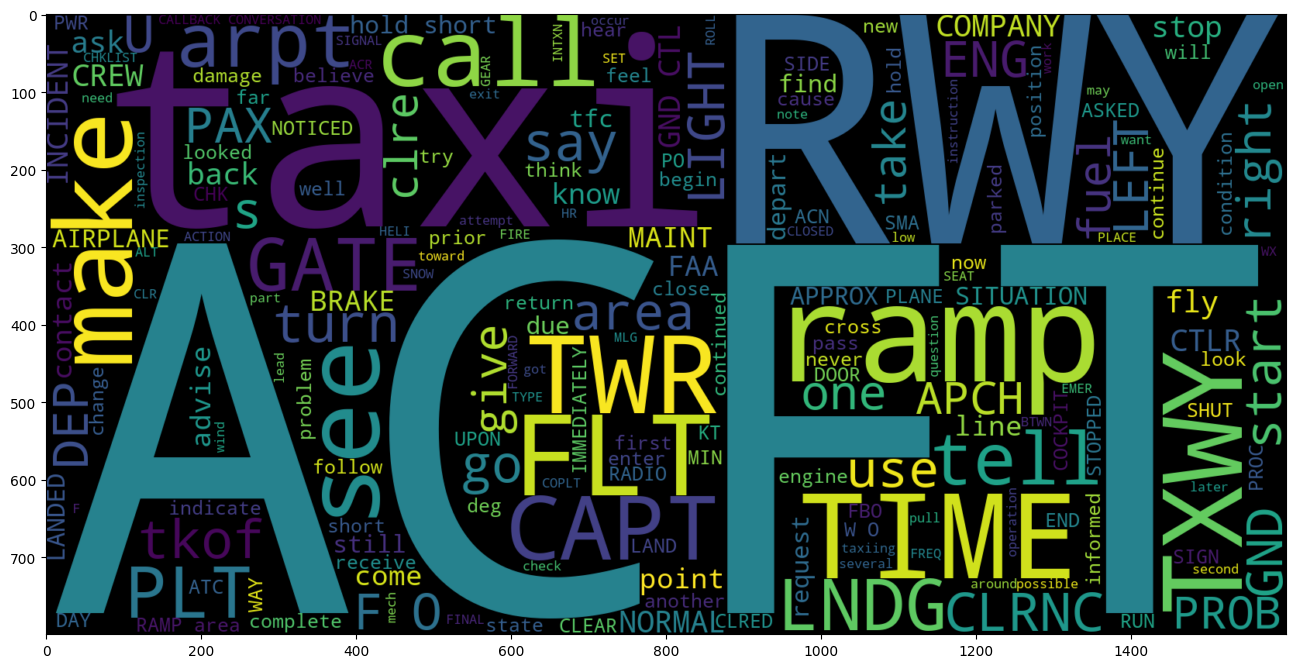

In [ ]:
'''
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size=10, max_font_size=3000, width=1600, height=800).generate(Narr_lemma_dict[1])
plt.imshow(wc, interpolation='bilinear')
'''